<a href="https://colab.research.google.com/github/sabdha/Object-Detection/blob/main/Opencv_Python_cardetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import os
import re
import cv2
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt 

In [45]:
#get file names of the frames
col_frames  = os.listdir('/content/drive/MyDrive/frames/')

#sort file names
col_frames.sort(key = lambda f: int(re.sub('\D', '', f)))

#empty list to  store the frames
col_images = []

for i in col_frames:
  #read the frames
  img = cv2.imread('/content/drive/MyDrive/frames/'+i)
  #append the frames to the list
  col_images.append(img)
col_images[12]

array([[[188, 176, 169],
        [225, 213, 206],
        [225, 213, 206],
        ...,
        [230, 230, 230],
        [230, 230, 230],
        [190, 190, 190]],

       [[206, 194, 187],
        [247, 235, 228],
        [246, 234, 227],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [210, 210, 210]],

       [[206, 194, 187],
        [248, 236, 229],
        [247, 235, 228],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [210, 210, 210]],

       ...,

       [[ 89,  89,  89],
        [113, 112, 112],
        [122, 120, 121],
        ...,
        [ 55,  51,  52],
        [ 45,  45,  45],
        [ 35,  35,  35]],

       [[ 89,  89,  89],
        [113, 111, 112],
        [111, 108, 109],
        ...,
        [ 74,  69,  69],
        [ 57,  54,  56],
        [ 42,  40,  40]],

       [[ 62,  62,  62],
        [ 70,  69,  70],
        [ 70,  67,  68],
        ...,
        [ 75,  68,  68],
        [ 67,  64,  65],
        [ 47,  44,  45]]

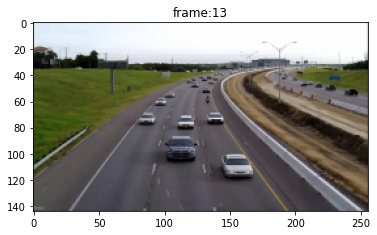

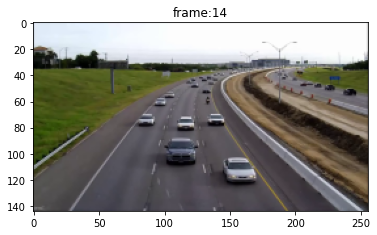

In [46]:
#display two consecutive frames
i= 13

for frame in [i, i+1]:
  plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
  plt.title("frame:"+str(frame))
  plt.show()

 It is difficult to find any difference between these above two frames. So taking the difference of the pixel values of two consecutive frames will help us observe the moving objects. So, let’s use the technique on the above two frames:

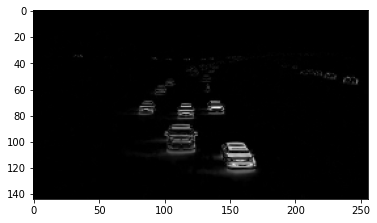

In [47]:
#convert the frames to greyscale
# cv2.cvtColor() method is used to convert an image from one color space to another. 
grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)

#plot the image after the frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

Everything that has not been moving is subtracted out.

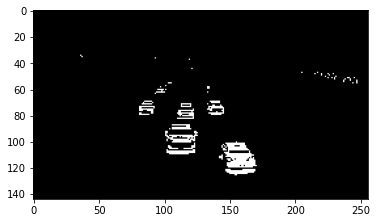

In [48]:
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
# to separate an object from the background in the image. 
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

The highlighted regions are a bit fragmented. So, we can apply image dilation over this image:

The dilate() method takes two inputs in which one is our input image; the second is called the structuring element or kernel, which decides the nature of the operation. Image dilation Increases the object area. 

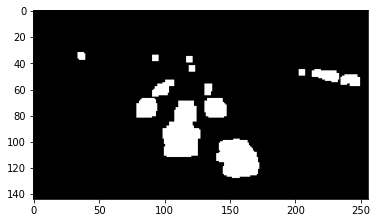

In [49]:
kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations = 2)

plt.imshow(dilated, cmap = 'gray')
plt.show()

Cars inside a particular zone will only be detected.

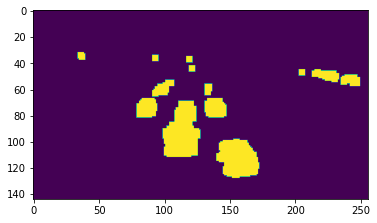

In [50]:
#plotting vehicle detection zone.
plt.imshow(dilated)
cv2.line(dilated, (0,60), (256, 60), (50, 0 ,0))
plt.show()

The vehicle detection zone is below Y = 60. Th eprogram will be detecting any movement below this zone only. 
The contours for the entire image will be stored in the variable contours. Only the contours that comes under the detection zone is required. cv2.contourArea() function is used to find this. The y-coordinate of the contour should be greater than 60 and the x-coordinate should be less than 256.

In [51]:
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 256) & (y >= 60) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

9

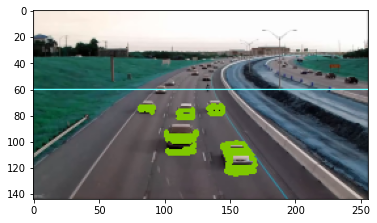

In [52]:
dmy = col_images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 60),(256,60),(100, 255, 255))
plt.imshow(dmy)
plt.show()

## Applying the same methods to video streaming 
Apply frame differencing on every pair of consecutive frames  
Apply image thresholding on the output image of the previous step  
Perform image dilation on the output image of the previous step  
Find contours in the output image of the previous step  
Shortlist contours appearing in the detection zone  
Save frames along with the final contours  

In [59]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "/content/drive/MyDrive/frames/contour_frames_3/"

for i in range(len(col_images)-1):
     
    # frame differencing
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 256) & (y >= 60) & (cv2.contourArea(cntr) >= 25):
            if (y >= 70) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
             # add contours to original frames
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 60),(256,60),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)  

In [60]:
# specify video name
pathOut = 'vehicle_detection_v3.mp4'

# specify frames per second
fps = 14.0

Stacking up frames into a single list.

In [61]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [63]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [64]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()

## Reference  
https://www.analyticsvidhya.com/blog/2020/04/vehicle-detection-opencv-python/  
https://www.geeksforgeeks.org/python-play-a-video-using-opencv/